<a href="https://colab.research.google.com/github/vishnurapps/FunctionalAPI-Tensorflow/blob/master/IRIS_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As of now we were studng about the Sequential models in keras. It is useful only in building simple models where the output of one layer goes to the input on next layer. We can use the simple sequential models to build LSTMs GRUs etc. 

Here we are making complex models using the functional api of tensorflow.

## Importing all required modules

In [0]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [30]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30,stratify=Y)

In [32]:
print("train data shape",X_train.shape)
print("test data shape",X_test.shape)

train data shape (120, 4)
test data shape (30, 4)


In [0]:
##convert Y to one hot coding vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
y_train_ohe = encoder.fit_transform(y_train.reshape(-1,1))
y_test_ohe = encoder.transform(y_test.reshape(-1,1))
y_train_ohe = y_train_ohe.toarray()
y_test_ohe = y_test_ohe.toarray()

In [34]:
print("shape of train labels",y_train_ohe.shape)
print("shape of test labels",y_test_ohe.shape)

shape of train labels (120, 3)
shape of test labels (30, 3)


In [0]:
#importing layers from tensorflow
from tensorflow.keras.layers import Dense,concatenate,Activation,Dropout,Input
from tensorflow.keras.models import Model

## Simple model using functional API

<pre><b>Simple Model using tf.keras Functional API</b>
<pre> We are writing code to Build model as below 

<img src="https://i.imgur.com/i1Lpk22.png"></pre><pre>

In [0]:
#clearing the graph of tensorflow
tf.keras.backend.clear_session()

# input to the model ( Input Layer )
Input_model = Input(shape=(4,),name="iris_input")

# layer 1
layer1 = Dense(units=32,activation='relu',kernel_initializer='he_normal',name="layer1")(Input_model)#we are giving output of input layer
#we got layer1 --> output of the first layer

# layer 2
layer2 = Dense(units=16,activation='relu',kernel_initializer='he_normal',name='layer2')(layer1)#we are giving output of first layer
#we got layer2 --> output of the second layer

#output
output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",name='output')(layer2)#we are giving output of second layer

# till now we connected all the network from input to output. 
# Now we have to create a model for this you have to give what is the input layer and what is the output layer

model = Model(inputs=Input_model,outputs=output) # we specified the model input and output


In [37]:
#summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
iris_input (InputLayer)      [(None, 4)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 32)                160       
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
#train
model.fit(X_train,y_train_ohe,batch_size=16,epochs=5,validation_data=(X_test,y_test_ohe))

Train on 120 samples, validate on 30 samples
Epoch 1/5
120/120 [==============================] - 0s 772us/sample - loss: 1.3307 - acc: 0.4167 - val_loss: 0.5722 - val_acc: 0.8000
Epoch 2/5
120/120 [==============================] - 0s 120us/sample - loss: 0.6033 - acc: 0.8250 - val_loss: 0.4844 - val_acc: 1.0000
Epoch 3/5
120/120 [==============================] - 0s 123us/sample - loss: 0.5157 - acc: 0.8750 - val_loss: 0.4272 - val_acc: 1.0000
Epoch 4/5
120/120 [==============================] - 0s 126us/sample - loss: 0.4521 - acc: 0.9167 - val_loss: 0.4004 - val_acc: 0.9000
Epoch 5/5
120/120 [==============================] - 0s 134us/sample - loss: 0.4170 - acc: 0.9000 - val_loss: 0.3719 - val_acc: 0.9667


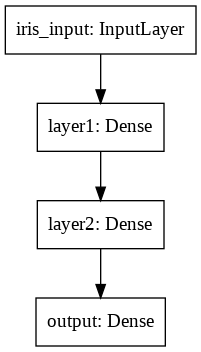

In [40]:
#drawing models
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

## Model with two inputs

<pre><b>Model with Two Inputs</b>
<pre> We are writing code to Build model as below 

<img src="https://i.imgur.com/xcSMxKN.png"></pre><pre><pre>

In [0]:
#clearing the graph of tensorflow
tf.keras.backend.clear_session()

# input to the model ( Input Layer 1 )
Input_model_1 = Input(shape=(4,),name="iris_input_1")

# layer 11
layer11 = Dense(units=32,activation='relu',kernel_initializer='he_normal',name="layer11")(Input_model_1)#we are giving output of input layer 1
#we got layer11 --> output of the first layer for first input


# input to the model ( Input Layer 2 )
Input_model_2 = Input(shape=(4,),name="iris_input_2")

# layer 12
layer12 = Dense(units=16,activation='sigmoid',kernel_initializer='glorot_uniform',name="layer12")(Input_model_2)#we are giving output of input layer 2
#we got layer12 --> output of the first layer for second input

# we got two outputs layer11,layer12
# concatenating those two outputs
concat_layer = concatenate(inputs=[layer11,layer12],name="concat")

# layer 2
layer2 = Dense(units=16,activation='relu',kernel_initializer='he_normal',name="layer2")(concat_layer)#we are giving output of concat layer
#we got layer2 --> output of the second layer

#output
output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",name="output")(layer2)#we are giving output of second layer

# till now we connected all the network from input to output. 
# Now we have to create a model for this you have to give what is the input layer and what is the output layer

model = Model(inputs=[Input_model_1,Input_model_2],outputs=output) # we specified the model input and output


In [42]:
#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
iris_input_1 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
iris_input_2 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
layer11 (Dense)                 (None, 32)           160         iris_input_1[0][0]               
__________________________________________________________________________________________________
layer12 (Dense)                 (None, 16)           80          iris_input_2[0][0]               
______________________________________________________________________________________________

In [0]:
#compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
#train
model.fit([X_train,X_train],y_train_ohe,batch_size=16,epochs=5,validation_data=([X_test,X_test],y_test_ohe))

Train on 120 samples, validate on 30 samples
Epoch 1/5
120/120 [==============================] - 0s 1ms/sample - loss: 1.3357 - acc: 0.5667 - val_loss: 0.6799 - val_acc: 0.6667
Epoch 2/5
120/120 [==============================] - 0s 149us/sample - loss: 0.6138 - acc: 0.6667 - val_loss: 0.6073 - val_acc: 0.7000
Epoch 3/5
120/120 [==============================] - 0s 160us/sample - loss: 0.6150 - acc: 0.6917 - val_loss: 0.5088 - val_acc: 0.7000
Epoch 4/5
120/120 [==============================] - 0s 152us/sample - loss: 0.4986 - acc: 0.6917 - val_loss: 0.4829 - val_acc: 0.7333
Epoch 5/5
120/120 [==============================] - 0s 131us/sample - loss: 0.4558 - acc: 0.7667 - val_loss: 0.4210 - val_acc: 0.7000


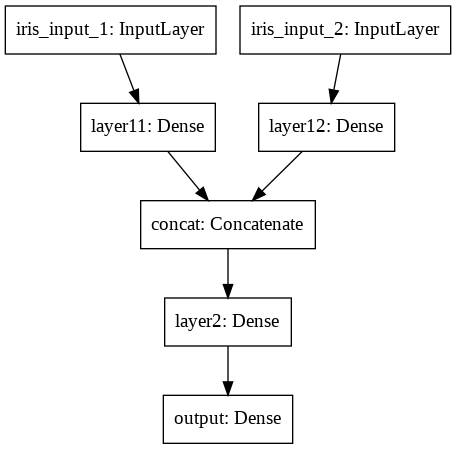

In [45]:
#drawing model
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

## Model with three inputs

In [0]:
## Model with three inputs

In [0]:
#clearing the graph of tensorflow
tf.keras.backend.clear_session()

# input to the model ( Input Layer 1 )
Input_model_1 = Input(shape=(4,),name="iris_input_1")

# layer 11
layer11 = Dense(units=32,activation='relu',kernel_initializer='he_normal',name="layer11")(Input_model_1)#we are giving output of input layer 1
#we got layer11 --> output of the first layer for first input


# input to the model ( Input Layer 2 )
Input_model_2 = Input(shape=(4,),name="iris_input_2")

# layer 12
layer12 = Dense(units=16,activation='sigmoid',kernel_initializer='glorot_uniform',name="layer12")(Input_model_2)#we are giving output of input layer 2
#we got layer12 --> output of the first layer for second input

# input to the model ( Input Layer 3 )
Input_model_3 = Input(shape=(4,),name="iris_input_3")

# layer 13
layer13 = Dense(units=16,activation='relu',kernel_initializer='he_normal',name="layer13")(Input_model_3)#we are giving output of input layer 2
#we got layer12 --> output of the first layer for second input

# we got two outputs layer11,layer12
# concatenating those two outputs
concat_layer = concatenate(inputs=[layer11,layer12, layer13],name="concat")

# layer 2
layer2 = Dense(units=16,activation='relu',kernel_initializer='he_normal',name="layer2")(concat_layer)#we are giving output of concat layer
#we got layer2 --> output of the second layer

#output
output = Dense(units=3,activation='softmax',kernel_initializer="glorot_uniform",name="output")(layer2)#we are giving output of second layer

# till now we connected all the network from input to output. 
# Now we have to create a model for this you have to give what is the input layer and what is the output layer

model = Model(inputs=[Input_model_1,Input_model_2,Input_model_3],outputs=output) # we specified the model input and output


In [48]:
#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
iris_input_1 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
iris_input_2 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
iris_input_3 (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
layer11 (Dense)                 (None, 32)           160         iris_input_1[0][0]               
______________________________________________________________________________________________

In [0]:
#compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
#train
model.fit([X_train,X_train,X_train],y_train_ohe,batch_size=16,epochs=5,validation_data=([X_test,X_test,X_test],y_test_ohe))

Train on 120 samples, validate on 30 samples
Epoch 1/5
120/120 [==============================] - 0s 1ms/sample - loss: 2.3500 - acc: 0.5167 - val_loss: 0.6488 - val_acc: 0.6667
Epoch 2/5
120/120 [==============================] - 0s 174us/sample - loss: 0.8410 - acc: 0.6333 - val_loss: 0.7107 - val_acc: 0.6667
Epoch 3/5
120/120 [==============================] - 0s 170us/sample - loss: 0.4961 - acc: 0.7667 - val_loss: 0.3733 - val_acc: 0.7667
Epoch 4/5
120/120 [==============================] - 0s 159us/sample - loss: 0.5109 - acc: 0.6917 - val_loss: 0.3188 - val_acc: 0.9000
Epoch 5/5
120/120 [==============================] - 0s 150us/sample - loss: 0.5781 - acc: 0.7833 - val_loss: 0.6618 - val_acc: 0.6667


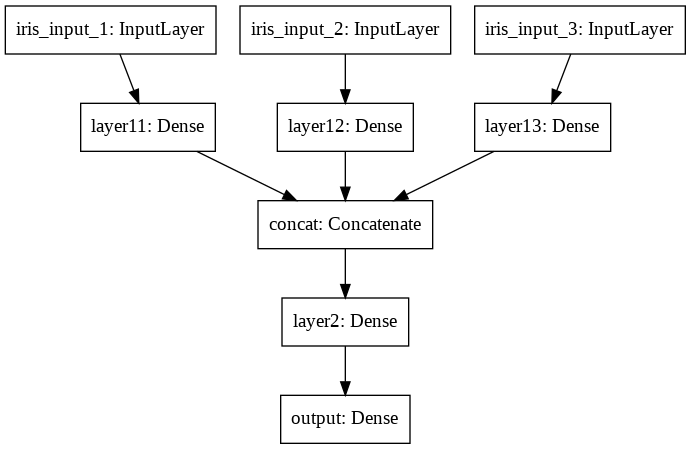

In [51]:
#drawing model
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)